<a href="https://colab.research.google.com/github/hurgj123kr/project2/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 먼저 제가 2000~2020년간 나온 노래들을 가지고 메타크리틱 AOTY사이트 두 곳에서 평점을 낸 데이터들입니다. 평소에 평점을 내는 사이트에 관심이 있었는데 음악이 그렇게 생소한 분야도 아니기도해서 이 데이터셋을 사용하게되었습니다.

#### 전문가들의 리뷰를 보고 다음리뷰점수를 에측하는 모델을 만들어서 그 예측점수에 따라 사람들에게 노래를 추천하는 프로그램을 만들어야합니다.

### 먼저 데이터를 불러와서 데이터의 타입, 결측치, 중복치, 카디널리티 확인한다.

In [1]:
import pandas as pd
url = '/content/music_2000.csv'
df = pd.read_csv(url)
df.head(5)

,Unnamed: 0,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44


In [2]:
df.dtypes

Unnamed: 0                   int64
Artist                      object
Title                       object
Release Month               object
Release Day                 object
Release Year                 int64
Format                      object
Label                       object
Genre                       object
Metacritic Critic Score    float64
Metacritic Reviews         float64
Metacritic User Score      float64
Metacritic User Reviews    float64
AOTY Critic Score            int64
AOTY Critic Reviews          int64
AOTY User Score              int64
AOTY User Reviews            int64
dtype: object

In [3]:
df.isnull().sum()

Unnamed: 0                     0
Artist                         0
Title                          1
Release Month                 84
Release Day                   85
Release Year                   0
Format                         0
Label                       2324
Genre                       6347
Metacritic Critic Score    11327
Metacritic Reviews         11327
Metacritic User Score      16110
Metacritic User Reviews    14636
AOTY Critic Score              0
AOTY Critic Reviews            0
AOTY User Score                0
AOTY User Reviews              0
dtype: int64

In [4]:
df.T.duplicated()
df['Release Year'].unique()

array([2009, 2011, 2004, 2005, 2007, 2006, 2003, 2001, 2000, 2002, 2008,
       2010, 2013, 2012, 2014, 2018, 2015, 2016, 2017, 2020, 2019])

In [5]:
df.describe(exclude='number')#숫자형데이터 확인
df.describe(exclude='object')#오브젝트형데이터 즉 문자열데이터임
df.describe(exclude='float').T.sort_values(by='unique')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Format,25193,2,LP,23464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release Month,25109,12,September,2785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release Day,25108,38,24,965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,18846,286,Indie Rock,1517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Label,22869,6729,Columbia,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artist,25193,11459,Guided By Voices,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,25192,23710,II,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 0,25193,NaN,NaN,NaN,17243.8,9768.96,0,8629,18254,25988,32357
Release Year,25193,NaN,NaN,NaN,2013.15,5.44572,2000,2010,2014,2018,2020
AOTY Critic Score,25193,NaN,NaN,NaN,71.7701,9.47229,4,67,73,78,100


In [6]:
#features object컬럼의 cardinality확인하는법
#object 타입의 featureas를 고르기
object_data =[]

for col in df.columns:
    if df[col].dtype=='object':
        object_data.append(col)
object_data
int_data = []
float_data =[]
#int리스트 형태로
for col in df.columns:
    if df[col].dtype=='int':
        int_data.append(col)
int_data
#float리스트 형태로 추출
float_data = []
for col in df.columns:
    if df[col].dtype=='float':
        float_data.append(col)

print("실수형:",float_data)
print("object:",object_data)
print("정수형:",int_data)

실수형: ['Metacritic Critic Score', 'Metacritic Reviews', 'Metacritic User Score', 'Metacritic User Reviews']
object: ['Artist', 'Title', 'Release Month', 'Release Day', 'Format', 'Label', 'Genre']
정수형: ['Unnamed: 0', 'Release Year', 'AOTY Critic Score', 'AOTY Critic Reviews', 'AOTY User Score', 'AOTY User Reviews']


In [7]:
df[object_data].describe().T.sort_values(by=['unique'])
#전체로
df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Format,25193,2,LP,23464
Release Month,25109,12,September,2785
Release Day,25108,38,24,965
Genre,18846,286,Indie Rock,1517
Label,22869,6729,Columbia,267
Artist,25193,11459,Guided By Voices,19
Title,25192,23710,II,21


### 결측치,중복치,카디널리티 확인을 해보니 결측치는 object데이터는 나 월,일,은 unknown으로, 숫자형데이터는 평균값을 넣어서 데체합니다.
### 중복치는 없습니다. 이상치도 확인해보겠습니다.

In [8]:
#float값들인열 이상치확인
for col in df.iloc[:,8:]:
    print(df[col].describe())
    print('-'*50)

count          18846
unique           286
top       Indie Rock
freq            1517
Name: Genre, dtype: object
--------------------------------------------------
count    13866.000000
mean        73.276792
std          8.397163
min         15.000000
25%         69.000000
50%         74.000000
75%         79.000000
max         98.000000
Name: Metacritic Critic Score, dtype: float64
--------------------------------------------------
count    13866.000000
mean        12.480456
std          7.914760
min          4.000000
25%          6.000000
50%         10.000000
75%         17.000000
max         51.000000
Name: Metacritic Reviews, dtype: float64
--------------------------------------------------
count    9083.000000
mean        7.780634
std         0.978252
min         1.400000
25%         7.400000
50%         8.000000
75%         8.500000
max         9.500000
Name: Metacritic User Score, dtype: float64
--------------------------------------------------
count    10557.000000
mean        

### 이상치 문제는 없습니다. 이제 결측치 데체 하겠습니다. 값들중에 메타크리틱 유저 점수는 한자릿수단위값이므로 다른 수치들과 똑같이 10단위로 맞춰주겠습니다.

In [9]:
df['Metacritic User Score'] = df['Metacritic User Score'] * 10
cols = ['Title','Release Month','Release Day','Label','Genre']
for col in cols:
    df[col].fillna('Unknown', inplace=True)

df.isnull().sum()

Unnamed: 0                     0
Artist                         0
Title                          0
Release Month                  0
Release Day                    0
Release Year                   0
Format                         0
Label                          0
Genre                          0
Metacritic Critic Score    11327
Metacritic Reviews         11327
Metacritic User Score      16110
Metacritic User Reviews    14636
AOTY Critic Score              0
AOTY Critic Reviews            0
AOTY User Score                0
AOTY User Reviews              0
dtype: int64

### 이제 수치형값들을 가지고있는 float타입의 열들의 결측치를 최대한 채워주겠습니다.

In [10]:
#나머지 메타크리틱 비평가 점수~ 메타크리틱 유저 리뷰까지 결측치 처리
#isna()는 결측치를 True Fals로 반환 하는것.
cols1 = ['Metacritic Critic Score','Metacritic Reviews','Metacritic User Score','Metacritic User Reviews']
for genre in df['Genre'].unique():
        for col in cols1:
            value = round(df.loc[df['Genre']== genre, col].mean(), 0)
            df.loc[(df['Genre']== genre) & (df[col].isna()),col]= value


df.isnull().sum()

Unnamed: 0                   0
Artist                       0
Title                        0
Release Month                0
Release Day                  0
Release Year                 0
Format                       0
Label                        0
Genre                        0
Metacritic Critic Score     96
Metacritic Reviews          96
Metacritic User Score      167
Metacritic User Reviews    149
AOTY Critic Score            0
AOTY Critic Reviews          0
AOTY User Score              0
AOTY User Reviews            0
dtype: int64

In [11]:
#아직 덜 채워져서 나머지 마저 채우겠습니다.
missing = df[df['Metacritic User Score'].isnull()]
missing.Genre.value_counts()

Folk Metal                    22
Screamo                       14
Industrial Techno             13
J-Pop                          9
Juke                           7
Symphonic Metal                6
Heavy Psych                    5
Acid House                     5
Outsider House                 5
Jazz-Funk                      4
Ambient House                  4
French Pop                     4
Neofolk                        4
Bossa Nova                     4
Musique concrÃ¨te              3
Dark Jazz                      3
Jazz-Rock                      3
Crossover Thrash               3
Acid Jazz                      3
Minimal Wave                   3
Acid Techno                    3
Digital Hardcore               3
UK Garage                      2
Ethereal Wave                  2
Plunderphonics                 2
Tropical House                 2
Future Funk                    2
Trap Metal                     2
Boom Bap                       2
Classical                      2
Funk Rock 

In [12]:
df[df['Genre'] == 'Folk Metal']

,Unnamed: 0,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
3137,3495,Alestorm,Black Sails at Midnight,May,27,2009,LP,Napalm,Folk Metal,NaN,NaN,NaN,NaN,70,1,74,10
6257,8560,Agalloch,Ashes Against the Grain,August,8,2006,LP,The End,Folk Metal,NaN,NaN,NaN,NaN,93,4,84,112
6258,8561,Agalloch,The Mantle,August,13,2002,LP,The End,Folk Metal,NaN,NaN,NaN,NaN,90,2,86,158
6383,8768,Eluveitie,Origins,August,1,2014,LP,Unknown,Folk Metal,NaN,NaN,NaN,NaN,80,3,74,8
7946,11244,Primordial,To the Nameless Dead,November,16,2007,LP,Metal Blade,Folk Metal,NaN,NaN,NaN,NaN,83,3,81,18
10431,15083,Ensiferum,Unsung Heroes,August,24,2012,LP,Spinefarm,Folk Metal,NaN,NaN,NaN,NaN,63,3,63,6
10432,15084,Ensiferum,Victory Songs,April,27,2007,LP,Spinefarm,Folk Metal,NaN,NaN,NaN,NaN,80,2,73,5
10433,15085,Ensiferum,Iron,April,15,2004,LP,Spinefarm,Folk Metal,NaN,NaN,NaN,NaN,80,2,81,6
10434,15086,Ensiferum,Ensiferum,January,7,2001,LP,Spinefarm,Folk Metal,NaN,NaN,NaN,NaN,80,2,85,5
12293,17823,Orphaned Land,Mabool: The Story of the Three Sons of Seven,February,23,2004,LP,Unknown,Folk Metal,NaN,NaN,NaN,NaN,95,2,84,17


### 확인해보니 인기가없는 Folk Metal이 아직 결측치가 남아있어서 AOTY데이터의 평균값으로 채우겠습니다.

In [13]:
cols2 = [['Metacritic Critic Score','AOTY Critic Score'],
        ['Metacritic Reviews','AOTY Critic Reviews'],
        ['Metacritic User Score','AOTY User Score'],
        ['Metacritic User Reviews','AOTY User Reviews']]
for genre in df['Genre'].unique():
    for col, x in cols2:
        value = round(df.loc[df['Genre']== genre, x].mean(),0)
        df.loc[(df['Genre']== genre) & (df[col].isna()),col]=value

df.isnull().sum()

Unnamed: 0                 0
Artist                     0
Title                      0
Release Month              0
Release Day                0
Release Year               0
Format                     0
Label                      0
Genre                      0
Metacritic Critic Score    0
Metacritic Reviews         0
Metacritic User Score      0
Metacritic User Reviews    0
AOTY Critic Score          0
AOTY Critic Reviews        0
AOTY User Score            0
AOTY User Reviews          0
dtype: int64

### feature enginnering전에 시각화 해주겠습니다.

In [14]:
#메타크리틱 유저 평점에 따른 인기가 많은 장르
top5 = df.groupby('Genre')['Metacritic User Score'].sum()
top5_User = top5.nlargest(5)
top5_User

Genre
Unknown              476073.0
Indie Rock           121033.0
Hip Hop              106250.0
Indie Pop             77190.0
Singer-Songwriter     60583.0
Name: Metacritic User Score, dtype: float64

In [15]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df['Title'].value_counts()

II                          21
III                         19
Forever                     11
Paradise                    10
V                            9
                            ..
The Crane Wife               1
Cocky                        1
Hello, I'm Doing My Best     1
Communions EP                1
Save Rock and Roll           1
Name: Title, Length: 23711, dtype: int64

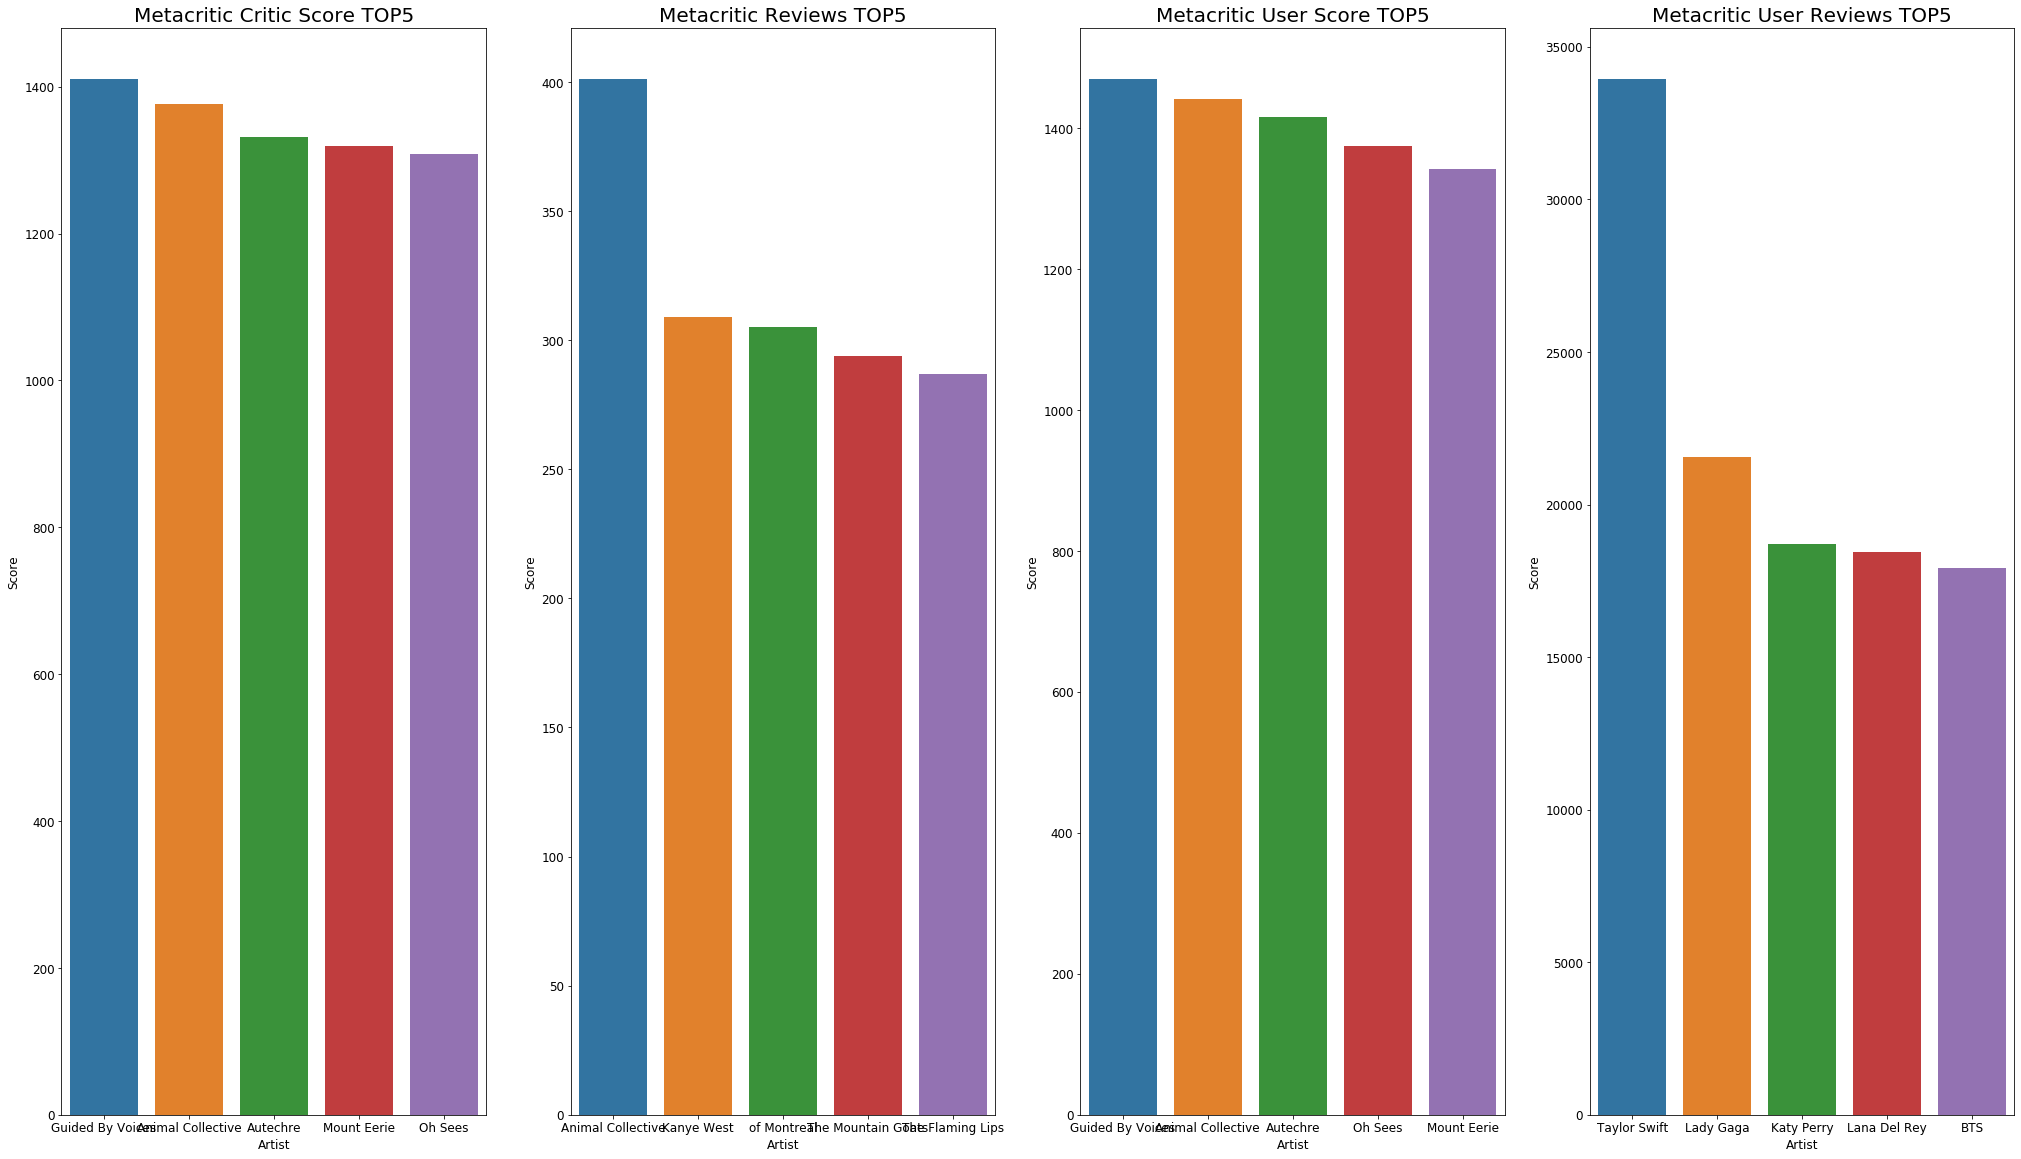

In [18]:
#시각화 
#아티스트별 메타크리틱 순위
Meta_artist = df[['Artist','Metacritic Critic Score', 'Metacritic Reviews', 'Metacritic User Score', 'Metacritic User Reviews']]
Meta_group = Meta_artist.groupby(['Artist']).sum()
Meta_df = Meta_group.reset_index()
def top5_artist(df, score_col):
    new_df = Meta_df.loc[:, ['Artist', score_col]].sort_values(by=score_col, ascending=False).reset_index(drop=True).head(5)
    new_df.columns = ['Artist', 'Score']
    return new_df
# Top5 데이터 저장
Critic_artist_top5 = top5_artist(Meta_df, 'Metacritic Critic Score')
Critic_rivew_artist_top5 = top5_artist(Meta_df, 'Metacritic Reviews')
User_artist_top5 = top5_artist(Meta_df, 'Metacritic User Score')
User_rivew_artist_top5 = top5_artist(Meta_df, 'Metacritic User Reviews')
#데이터 리스트에 담기
data_list = [Critic_artist_top5, Critic_rivew_artist_top5, User_artist_top5, User_rivew_artist_top5]
columns_list = Meta_df.columns[1:]
#그래프 그리기
fig, axs = plt.subplots(figsize=(35, 20), nrows=1, ncols=4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP5', fontsize=20)
    sns.barplot(x='Artist', y='Score', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=12)
    axs[i].set_xlabel('Artist', fontsize=12)
    axs[i].set_ylabel('Score', fontsize=12)
    
plt.show()

### 이제 테스트 데이터 훈련데이터로 모델학습을 하겠습니다.

In [19]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, train_size=0.8,test_size=0.2,random_state=2)
train,val = train_test_split(train, train_size=0.8,test_size=0.2,random_state=2)
train.shape,val.shape,test.shape

((16123, 17), (4031, 17), (5039, 17))

### 이제 feature enginnering 해주겠습니다

In [20]:
def engineer(en):
    
    #새로운 특성 생성하기
    #두 사이트의 비평가 점수 평균
    en['Critic Score'] = round(en[['Metacritic Critic Score', 'AOTY Critic Score']].mean(axis=1), 0)
    #두 사이트의 리뷰 평균
    en['Critic Reviews'] = round(en[['Metacritic Reviews','AOTY Critic Reviews']].mean(axis=1), 0)
    #두 사이트의 유저 점수 평균
    en['User Score'] = round(en[['Metacritic User Score', 'AOTY User Score']].mean(axis=1), 0)
    #두 사이트의 유저 리뷰 평균
    en['User Reviews'] = round(en[['Metacritic User Reviews','AOTY User Reviews']].mean(axis=1),0)
    #필요 없는 컬럼 지우기
    dels = ['Unnamed: 0','Metacritic Critic Score', 'AOTY Critic Score','Metacritic Reviews','AOTY Critic Reviews'
            ,'Metacritic User Score', 'AOTY User Score','Metacritic User Reviews','AOTY User Reviews',]
    en.drop(columns=dels, inplace= True)
    
    return en


train =engineer(train)
val = engineer(val)
test = engineer(test)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Critic Score,Critic Reviews,User Score,User Reviews
10576,Grizfolk,Waking Up the Giants,January,8,2016,LP,Virgin,Indie Pop,66.0,8.0,68.0,22.0
8503,44,When Your Heart Stops Beating,November,13,2006,LP,Unknown,Pop Punk,60.0,8.0,74.0,40.0
20935,Matthew Tavares & Leland Whitty,Visions,March,20,2020,LP,Unknown,Unknown,74.0,4.0,76.0,8.0
13887,Blue Iverson,Hotep,April,11,2017,EP,World,R&B,70.0,8.0,76.0,108.0
21752,Black Crown Initiate,Violent Portraits of Doomed Escape,August,7,2020,LP,Century Media,Unknown,74.0,4.0,74.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24591,Nik BÃ¤rtsch's Mobile,Continuum,March,18,2016,LP,ECM,Unknown,71.0,10.0,85.0,76.0
11911,Blut Aus Nord,Memoria Vetusta II: Dialogue with the Stars,February,23,2009,LP,Candlelight,Unknown,78.0,4.0,77.0,8.0
3972,Death Cab For Cutie,The Open Door EP,March,31,2009,EP,"Atlantic, Barsuk",Alternative Rock,76.0,6.0,80.0,16.0
14096,Have Mercy,A Place of Our Own,October,27,2014,LP,Hopeless,Unknown,66.0,4.0,76.0,8.0


### 학습전에 유저 점수에따른 인기있는 가수

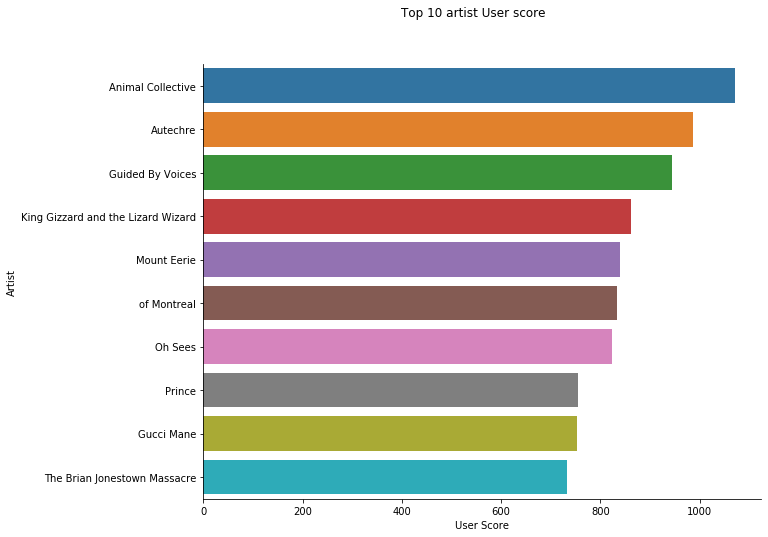

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

data_artist = train[['Artist', 'User Score',]].copy()

critics = data_artist[['Artist', 'User Score']]
critics_group = critics.groupby('Artist').sum()
critics_group.sort_values(by=['User Score'], ascending=False, inplace=True)
sns.barplot(ax=ax, x='User Score', y=critics_group.index[0:10], data=critics_group[0:10])
ax.set_xlabel('User Score')
ax.set_ylabel('Artist')

plt.suptitle('Top 10 artist User score')
plt.subplots_adjust(hspace=0.3)
sns.despine(left=False, bottom=False)

### 비평가 점수로도 확인해보겠습니다.

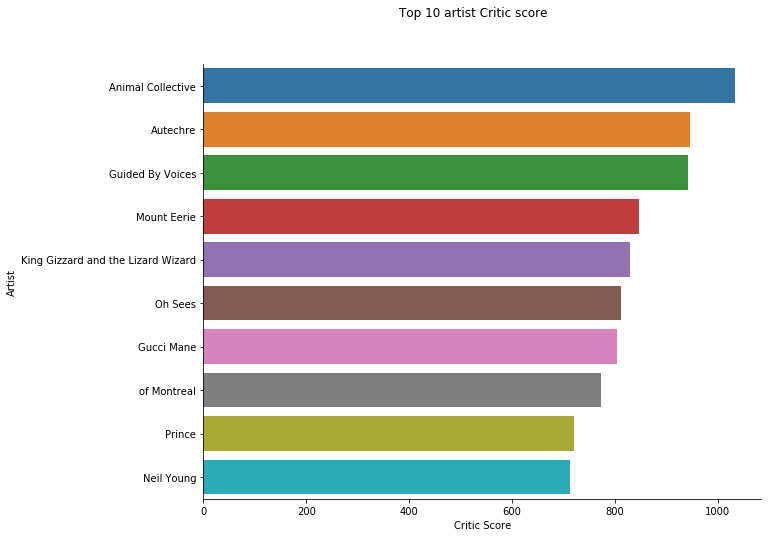

In [22]:
fig, ax = plt.subplots(figsize=(10,8))

data_artist = train[['Artist', 'Critic Score',]].copy()

critics = data_artist[['Artist', 'Critic Score']]
critics_group = critics.groupby('Artist').sum()
critics_group.sort_values(by=['Critic Score'], ascending=False, inplace=True)
sns.barplot(ax=ax, x='Critic Score', y=critics_group.index[0:10], data=critics_group[0:10])
ax.set_xlabel('Critic Score')
ax.set_ylabel('Artist')

plt.suptitle('Top 10 artist Critic score')
plt.subplots_adjust(hspace=0.3)
sns.despine(left=False, bottom=False)

### 신기하게도 둘다 5위 까지의 아티스트 순위가 같습니다. 그만큼 노래가 좋은것같습니다.
### 이제 회귀문제로 학습하도록하겠습니다. 타겟은 다음에 나올 비평가 리뷰가 몇점일지입니다.
#### 타겟의 분포먼저 확인하겠습니다.

In [23]:
target = train['Critic Reviews']

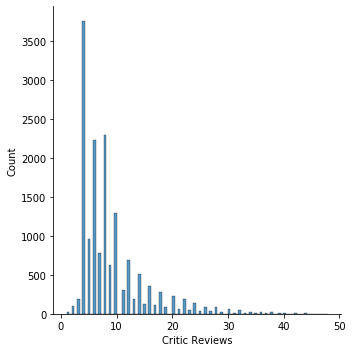

In [24]:
sns.displot(target);# 한눈에 봐도 왼쪽으로 쏠려있습니다.

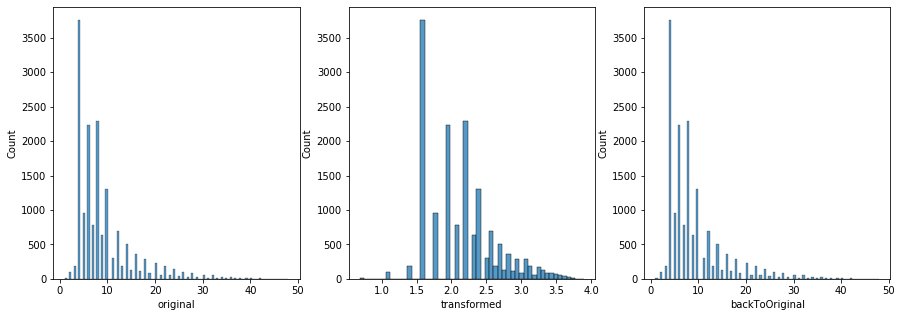

In [25]:
#데이터의 불균형을 해결하기위해 로그변환을 해주겠습니다.
import numpy as np
plots=pd.DataFrame()
plots['original']=target
plots['transformed']=np.log1p(target)
plots['backToOriginal']=np.expm1(np.log1p(target))

fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(plots['original'], ax=ax[0]);
sns.histplot(plots['transformed'], ax=ax[1]);
sns.histplot(plots['backToOriginal'], ax=ax[2]);
#로그 변환을 해주니 많이 괜찮아지는 형태의 분포가 나옵니다.

In [26]:
!pip install --upgrade category_encoders

In [27]:
#먼저 기준모델을 만들겠습니다.
train['Critic Reviews'].mean()

8.983625876077653

In [28]:
# label 정의
target = 'Critic Reviews'
y_train = train[target]
y_test = test[target]

In [29]:
# Critic Reviews 평균값으로 예측(기준모델)
predict = y_train.mean()
predict

8.983625876077653

In [30]:
#기준모델 훈련 mae,mse,msle
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train,y_pred)
msle= mean_squared_log_error(y_train,y_pred)
print(f'훈련 에러: {mae:.2f}')
print(f'훈련 에러2: {mse:.2f}')
print(f'훈련 에러3: {msle:.2f}')

훈련 에러: 4.33
훈련 에러2: 36.93
훈련 에러3: 0.27


In [31]:
# 테스트 에러(MAE),mse,msle
y_pred = [predict] * len(y_test)
mae1 = mean_absolute_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
msle1 = mean_squared_log_error(y_test,y_pred)
print(f'테스트 에러: {mae1:.2f}')
print(f'테스트 에러2: {mse1:.2f}')
print(f'테스트 에러3: {msle1:.2f}')

테스트 에러: 4.34
테스트 에러2: 37.03
테스트 에러3: 0.27


In [32]:
#타겟,특성으로 데이터 분리
features = train.drop(columns=target).columns
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]


In [33]:
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score


model1 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    preprocessing.StandardScaler(),
    RandomForestRegressor(random_state=2)
)

model1.fit(X_train, y_train)
model1.score(X_val, y_val)
y_pred = model1.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val,y_pred)
print(f'검증 에러: {mae:.2f}')
print(f'검증 에러: {mse:.2f}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


검증 에러: 2.99
검증 에러: 19.34


In [34]:
from sklearn.linear_model import Ridge

model2 = make_pipeline(
    OrdinalEncoder(), 
    preprocessing.StandardScaler(),
    Ridge(normalize=True)
)

model2.fit(X_train, y_train)
model2.score(X_val, y_val)
y_pred = model2.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val,y_pred)
print(f'검증 에러: {mae:.2f}')
print(f'검증 에러: {mse:.2f}')
#ridge 모델이 더 좋은 결과를 얻엇습니다.

검증 에러: 4.21
검증 에러: 36.33


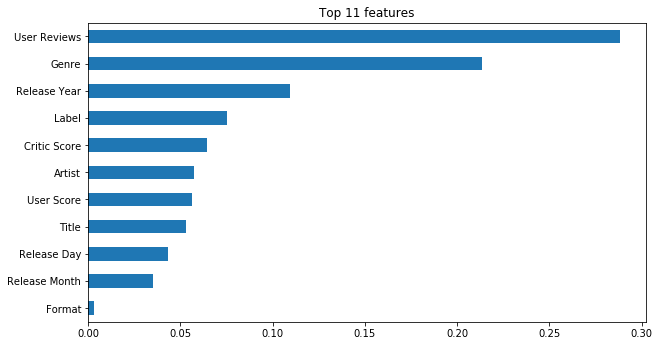

In [35]:
# 특성 중요도
rf = model1.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 11
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [36]:
!pip install eli5

In [37]:
!pip install --upgrade xgboost

In [38]:
from sklearn.pipeline import Pipeline
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestRegressor(random_state=2, n_jobs=-1)) 
])

In [39]:
pipe.named_steps

{'preprocessing': Pipeline(memory=None,
          steps=[('ordinalencoder',
                  OrdinalEncoder(cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 mapping=None, return_df=True, verbose=0)),
                 ('simpleimputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='mean',
                                verbose=0))],
          verbose=False),
 'rf': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
       

In [40]:
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.5241415098000084


In [41]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    model1.named_steps['randomforestregressor'], # model
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [42]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Genre           -0.043636
Artist          -0.024741
Release Year     0.000000
Critic Score     0.000000
User Score       0.000000
Release Month    0.001170
Release Day      0.001602
Title            0.004447
Format           0.010281
Label            0.022175
User Reviews     0.145447
dtype: float64

In [43]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, #모든 특성 확인
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.1454 ± 0.0142,User Reviews
0.0222 ± 0.0103,Label
0.0103 ± 0.0022,Format
0.0044 ± 0.0021,Title
0.0016 ± 0.0010,Release Day
0.0012 ± 0.0005,Release Month
0 ± 0.0000,User Score
0 ± 0.0000,Critic Score
0 ± 0.0000,Release Year
-0.0247 ± 0.0081,Artist


In [44]:
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]

#### 베이스 모델 점수보다 이제 높게 구하겠습니다.
### 타겟에 필요없는 컬럼들을 제거후 최적의 하이퍼 파라미터튜닝을 찾아서 다시 학습 시켜주겠습니다.

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]
X_test_selected = X_test[features]

In [47]:
#특성중요도에 따른 특성 제거
print('특성 삭제 후:', X_train_selected.shape, X_val_selected.shape)
X_train_selected

특성 삭제 후: (16123, 6) (4031, 6)


,Title,Release Month,Release Day,Format,Label,User Reviews
10576,Waking Up the Giants,January,8,LP,Virgin,22.0
8503,When Your Heart Stops Beating,November,13,LP,Unknown,40.0
20935,Visions,March,20,LP,Unknown,8.0
13887,Hotep,April,11,EP,World,108.0
21752,Violent Portraits of Doomed Escape,August,7,LP,Century Media,8.0
...,...,...,...,...,...,...
24591,Continuum,March,18,LP,ECM,76.0
11911,Memoria Vetusta II: Dialogue with the Stars,February,23,LP,Candlelight,8.0
3972,The Open Door EP,March,31,EP,"Atlantic, Barsuk",16.0
14096,A Place of Our Own,October,27,LP,Hopeless,8.0


### 특성 중요도에따라 필요없는 특성을 제거한후 randomizedsearchcv를 통해서 최적의 하이퍼 파라미터 를 찾아서 학습시키겠습니다.

In [48]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import StandardScaler

ord_col =['Release Month','Release Day','User Reviews']
pipe2 = make_pipeline(
    OrdinalEncoder(ord_col),
    SimpleImputer(), 
    StandardScaler(), 
    RandomForestRegressor()
)
dists = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 150), 
    'randomforestregressor__max_depth': [5, 10, 15, 20,], 
    'randomforestregressor__max_features': uniform(0, 1)
}
search = RandomizedSearchCV(
    pipe2, 
    param_distributions=dists, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)



search.fit(X_train_selected, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   24.4s finished


### 로그변환해서 값을 구하니 더떨어집니다.. 그냥 구해야할듯합니다. 0.28180366512818233

In [49]:
print('최적 하이퍼파라미터: ', search.best_params_)
print('CV MAE: ', -search.best_score_)
model = search.best_estimator_

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 15, 'randomforestregressor__max_features': 0.9877430939388493, 'randomforestregressor__n_estimators': 121, 'simpleimputer__strategy': 'median'}
CV MAE:  3.9022751432056744


In [50]:
#Ridge모델에도 적용하겠습니닷.
ord_col =['Release Month','Release Day','User Reviews']

pipe3 = make_pipeline(
    OrdinalEncoder(ord_col),
    SimpleImputer(), 
    StandardScaler(), 
    Ridge(random_state=2)
)
dists = {
    'simpleimputer__strategy': ['mean', 'median'], 
    "ridge__alpha" : np.linspace(2,5,10) ,
    "ridge__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "ridge__tol" : np.logspace(-5,0,10) ,
}
random = RandomizedSearchCV(
    pipe3, 
    param_distributions=dists, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

random.fit(X_train_selected, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.1s finished


In [51]:
print('최적 하이퍼파라미터: ', random.best_params_)
print('CV MAE: ', -random.best_score_)
model2 = random.best_estimator_

최적 하이퍼파라미터:  {'simpleimputer__strategy': 'mean', 'ridge__tol': 0.021544346900318846, 'ridge__solver': 'sparse_cg', 'ridge__alpha': 5.0}
CV MAE:  4.005453773488205


### 이제 최적의 하이퍼파파미터로 학습된걸로 테스트에 적용하기
### 최종 평가지표는 mae,r2를 사용하여 계산했습니다.

In [52]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test_selected)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(f'테스트세트 랜덤포레스트회귀 MAE: ${mae:,.2f}')
print(f'테스트세트 랜덤포레스트회귀 r2: ${r2:,.2f}')

테스트세트 랜덤포레스트회귀 MAE: $3.77
테스트세트 랜덤포레스트회귀 r2: $0.31


In [53]:
y_pred2 = model2.predict(X_test_selected)
mae2 = mean_absolute_error(y_test, y_pred2)
r2_1 = r2_score(y_test,y_pred2)
print(f'테스트세트 릿지모델 MAE: ${mae2:,.2f}')
print(f'테스트세트 릿지모델 r2: ${r2_1:,.2f}')

테스트세트 릿지모델 MAE: $4.00
테스트세트 릿지모델 r2: $0.15


### r2가 확실하게 모델을 성능을 알수있기떄문에 사용을 한 평가지표입니다.
### 하지만 회귀모델 평가지표중 하나인 r2로 확인을 해본결과 제가 만든 모델은 그다지 좋은 성능을 가지고 있지 않은듯합니다.
### 이제 최종모델을 만들겠습니다.

In [54]:
X_total = pd.concat([X_train_selected, X_test_selected])
y_total = pd.concat([y_train, y_test])

In [55]:
pipe4 = make_pipeline(
    OrdinalEncoder(ord_col),
    SimpleImputer(), 
    StandardScaler(), 
    RandomForestRegressor()
)
dists = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 150), 
    'randomforestregressor__max_depth': [5, 10, 15, 20,], 
    'randomforestregressor__max_features': uniform(0, 1)
}
search = RandomizedSearchCV(
    pipe4, 
    param_distributions=dists, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)



search.fit(X_total, y_total);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   19.3s finished


In [56]:
print('최적 하이퍼파라미터: ', search.best_params_)
print('CV MAE: ', -search.best_score_)
model3 = search.best_estimator_

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 0.613564743455144, 'randomforestregressor__n_estimators': 110, 'simpleimputer__strategy': 'mean'}
CV MAE:  3.738242273129046


In [57]:

pipe5 = make_pipeline(
    OrdinalEncoder(ord_col),
    SimpleImputer(), 
    StandardScaler(), 
    Ridge(random_state=2)
)
dists = {
    'simpleimputer__strategy': ['mean', 'median'], 
    "ridge__alpha" : np.linspace(2,5,10) ,
    "ridge__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "ridge__tol" : np.logspace(-5,0,10) ,
}
random = RandomizedSearchCV(
    pipe5, 
    param_distributions=dists, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

random.fit(X_total, y_total);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.2s finished


In [58]:
print('최적 하이퍼파라미터: ', random.best_params_)
print('CV MAE: ', -random.best_score_)
model4 = random.best_estimator_

최적 하이퍼파라미터:  {'simpleimputer__strategy': 'mean', 'ridge__tol': 1.0, 'ridge__solver': 'cholesky', 'ridge__alpha': 2.6666666666666665}
CV MAE:  4.007309198844829


In [59]:
y_pred3 = model3.predict(X_total)
y_pred4 = model4.predict(X_total)
r2_2= r2_score(y_total,y_pred3)
r2_3= r2_score(y_total,y_pred4)
print(f'테스트세트 랜덤포레스트회귀 r2: ${r2_2:,.2f}')
print(f'테스트세트 릿지모델 r2: ${r2_3:,.2f}')

테스트세트 랜덤포레스트회귀 r2: $0.32
테스트세트 릿지모델 r2: $0.14


### 최종모델로 확인한 r2값이 더 높아진걸로 보아서 특성수가 부족해서 떨어진것 아닌듯합니다.
## 이제 pdp,shap로 모델에대허서 설명하도록하겠습니다.

In [60]:
coefficients = model4.named_steps['ridge'].coef_
pd.Series(coefficients, X_total.columns)

Title            0.245322
Release Month    0.031415
Release Day     -0.066595
Format          -0.703123
Label           -0.558105
User Reviews     2.103725
dtype: float64

### 릿지모델로 타겟에 대해 좋은 영향을 주는 특성이나 안좋은 영향을 주는 특성을 확인해보니
#### 타이틀이 오를수록 0.245315씩 비평가 리뷰 평점이 증가하고,
#### 출시월,유저리뷰점수 또한 증가함에따라 비평가 리뷰 평점이 증가합니다.
#### 그외에 특성들은 감소 시키고요.

In [61]:
#이미지 화질 조절하기
plt.rcParams['figure.dpi'] = 144

In [62]:
!pip install pdpbox

  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [63]:
from pdpbox.pdp import pdp_isolate, pdp_plot
X_total

,Title,Release Month,Release Day,Format,Label,User Reviews
10576,Waking Up the Giants,January,8,LP,Virgin,22.0
8503,When Your Heart Stops Beating,November,13,LP,Unknown,40.0
20935,Visions,March,20,LP,Unknown,8.0
13887,Hotep,April,11,EP,World,108.0
21752,Violent Portraits of Doomed Escape,August,7,LP,Century Media,8.0
...,...,...,...,...,...,...
21413,Pure Luxury,July,10,LP,Memphis Industries,26.0
5054,Simple Plan,February,12,LP,"Lava, Atlantic",46.0
9937,The Young OG Project,December,25,LP,Desert Storm,8.0
9713,Crayons,May,20,LP,Unknown,24.0


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


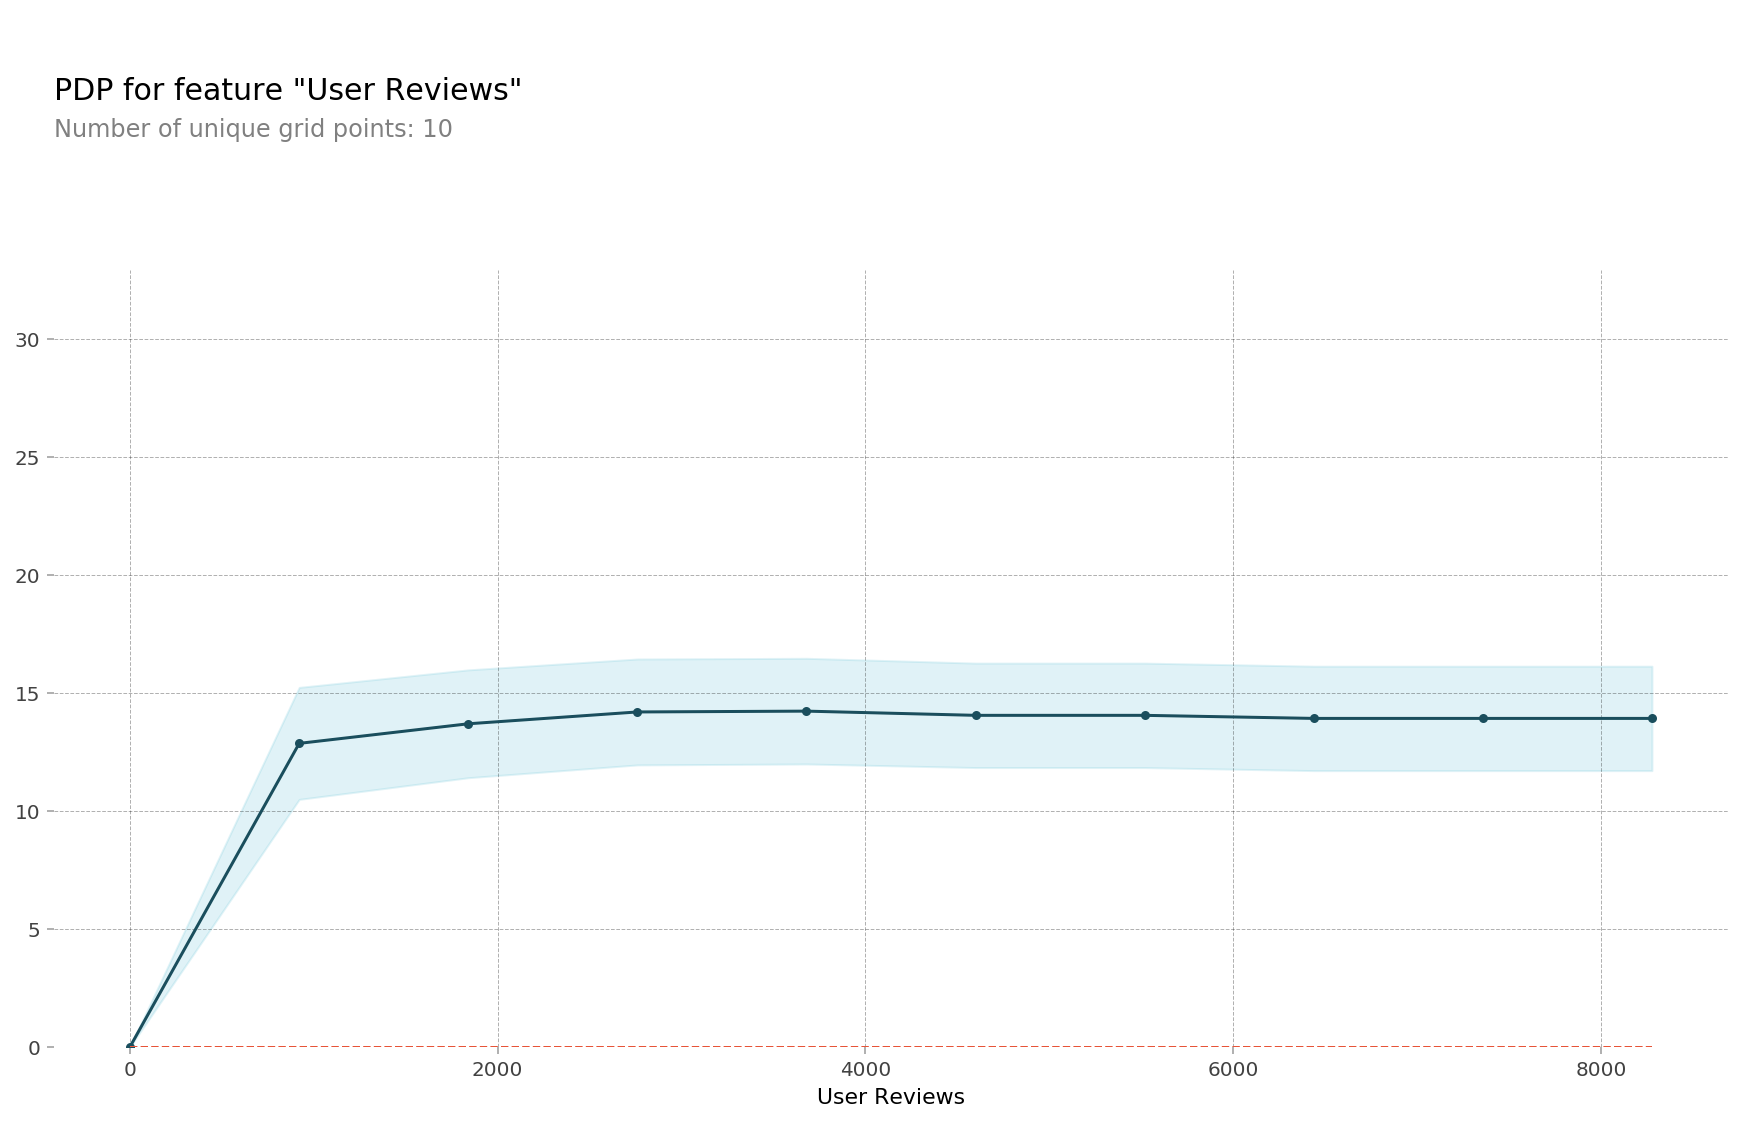

In [64]:
feature = 'User Reviews'
isolated = pdp_isolate(
    model=model3, 
    dataset=X_total, 
    model_features=X_total.columns, 
    feature=feature,
    grid_type='equal'
)
pdp_plot(isolated, feature_name=feature);

### 랜덤포레스트회귀모델에서 유저 리뷰와 타겟은 양의 관계를 가집니다.
#### 이어서 릿지모델에서도 확인해보겠습니다. >릿지모델 또한 똑같은 양의관계 이지만 수직상승하는 곡선을 보여주고 있습니다.

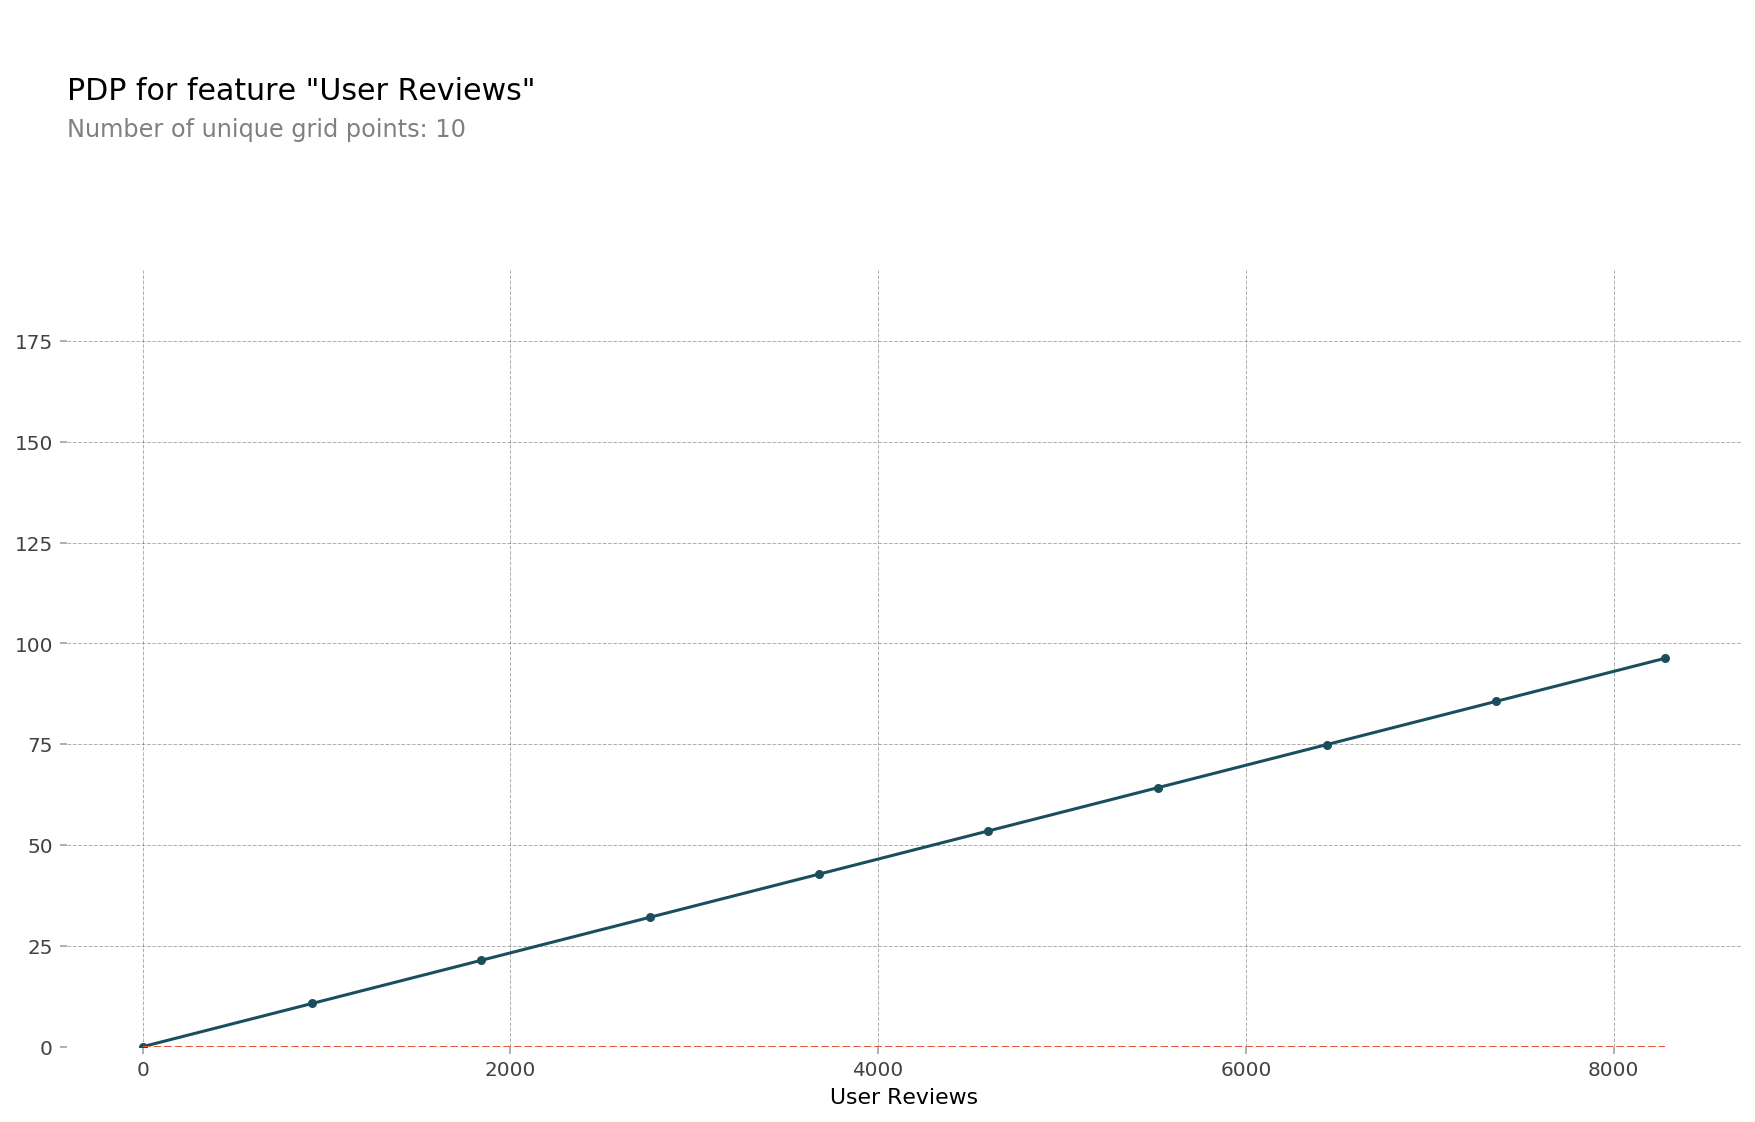

In [65]:
isolated = pdp_isolate(
    model=model4, 
    dataset=X_total, 
    model_features=X_total.columns, 
    feature=feature,
    grid_type='equal', 
)
pdp_plot(isolated, feature_name=feature);

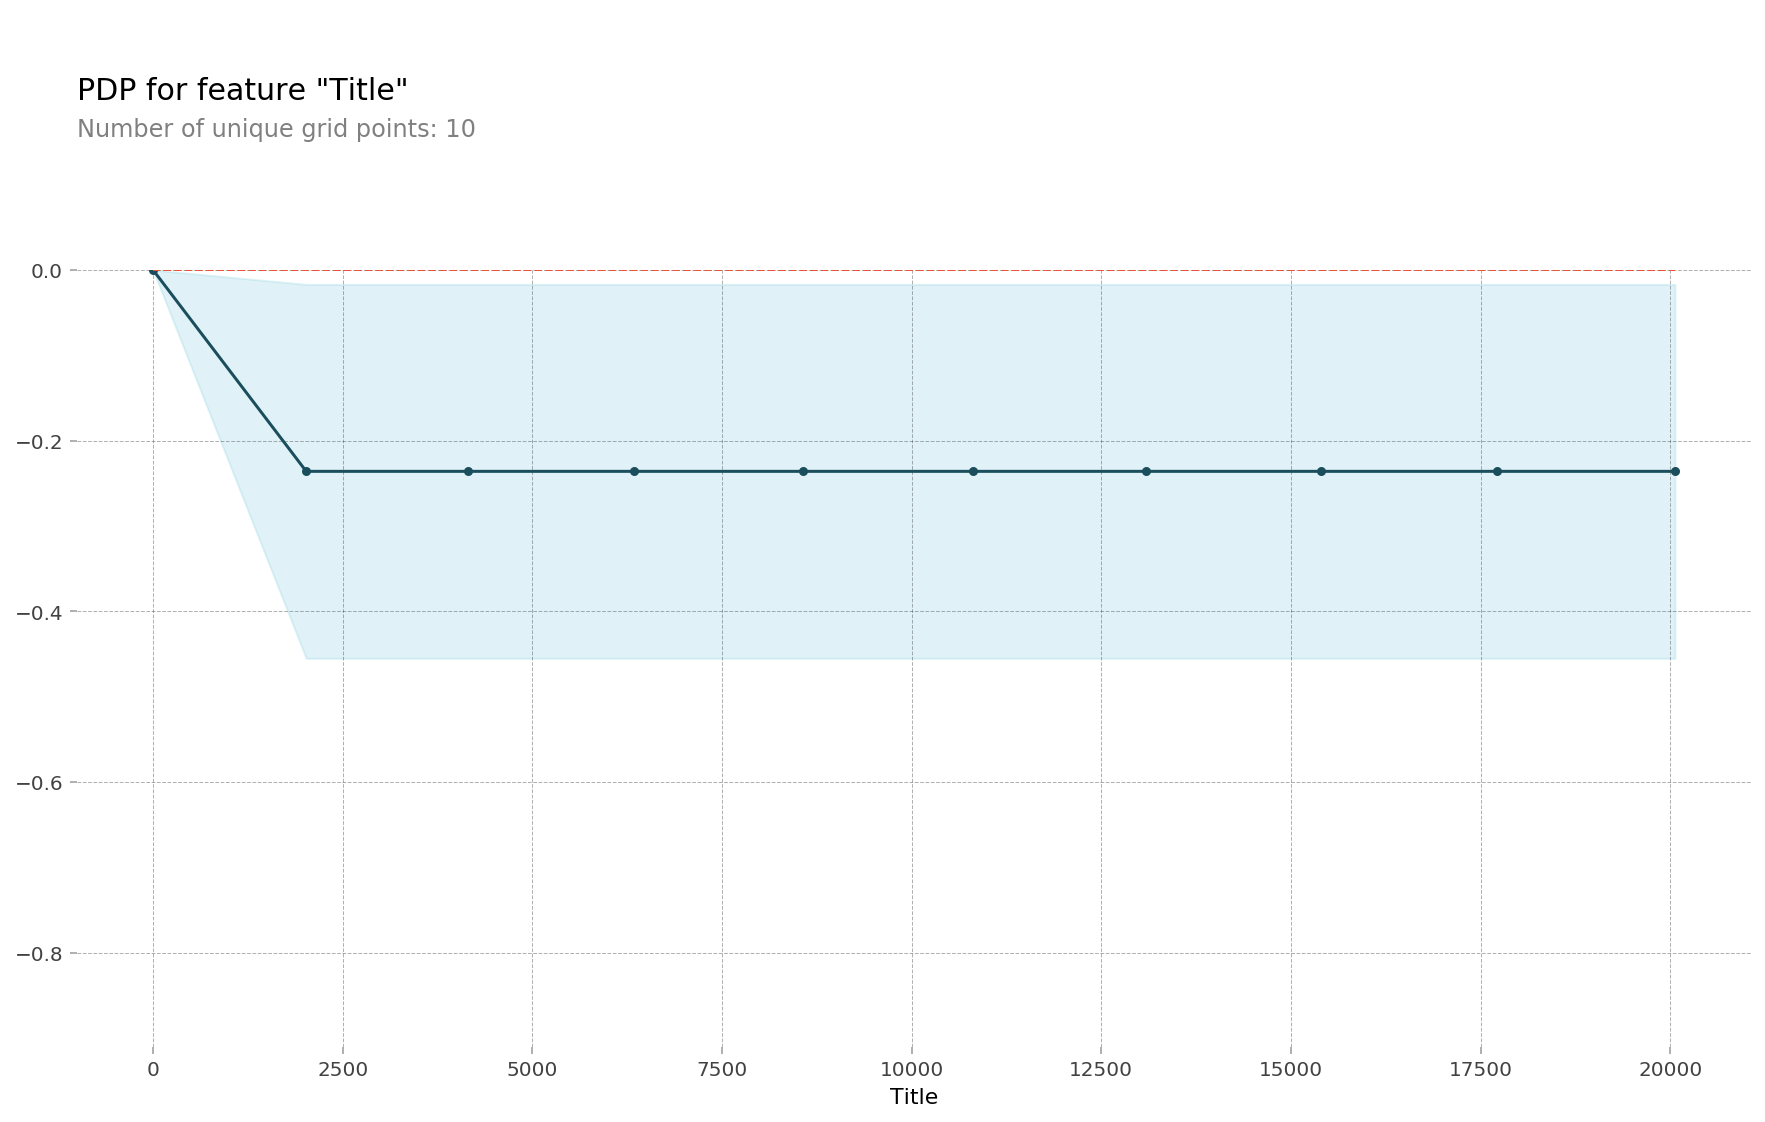

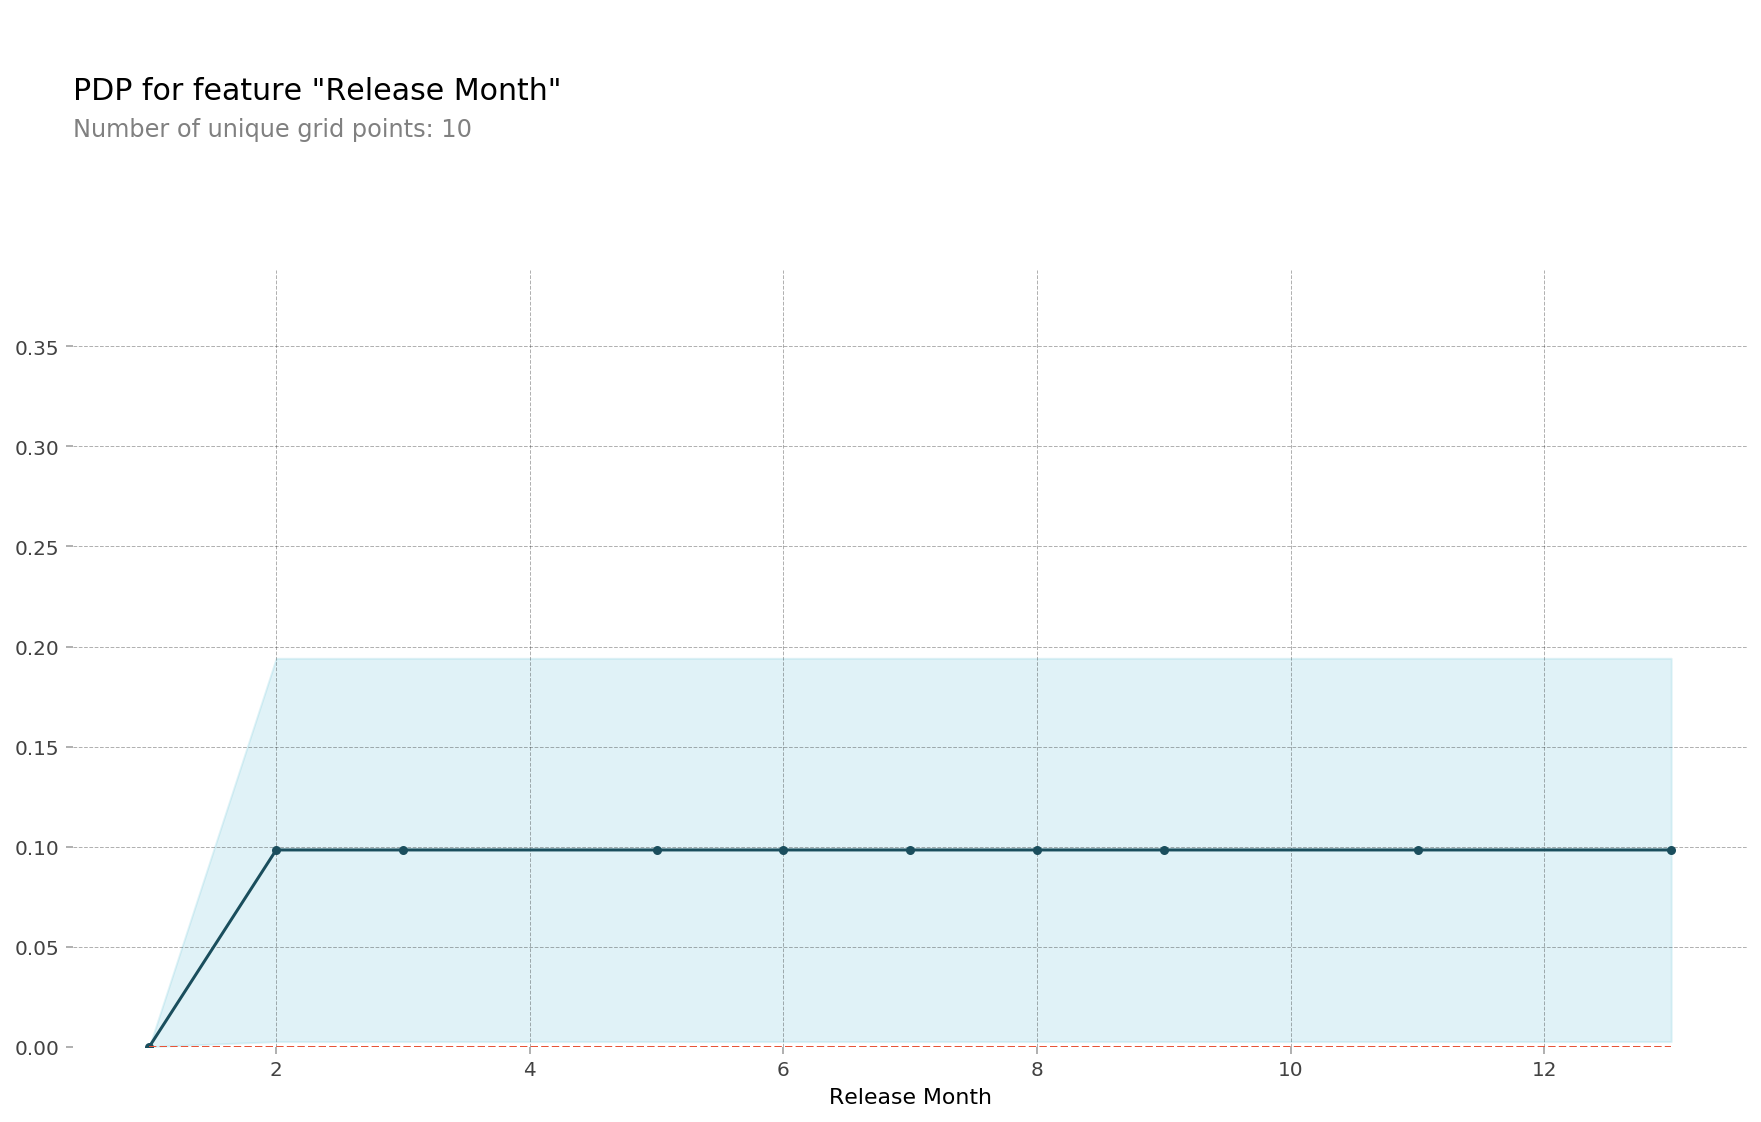

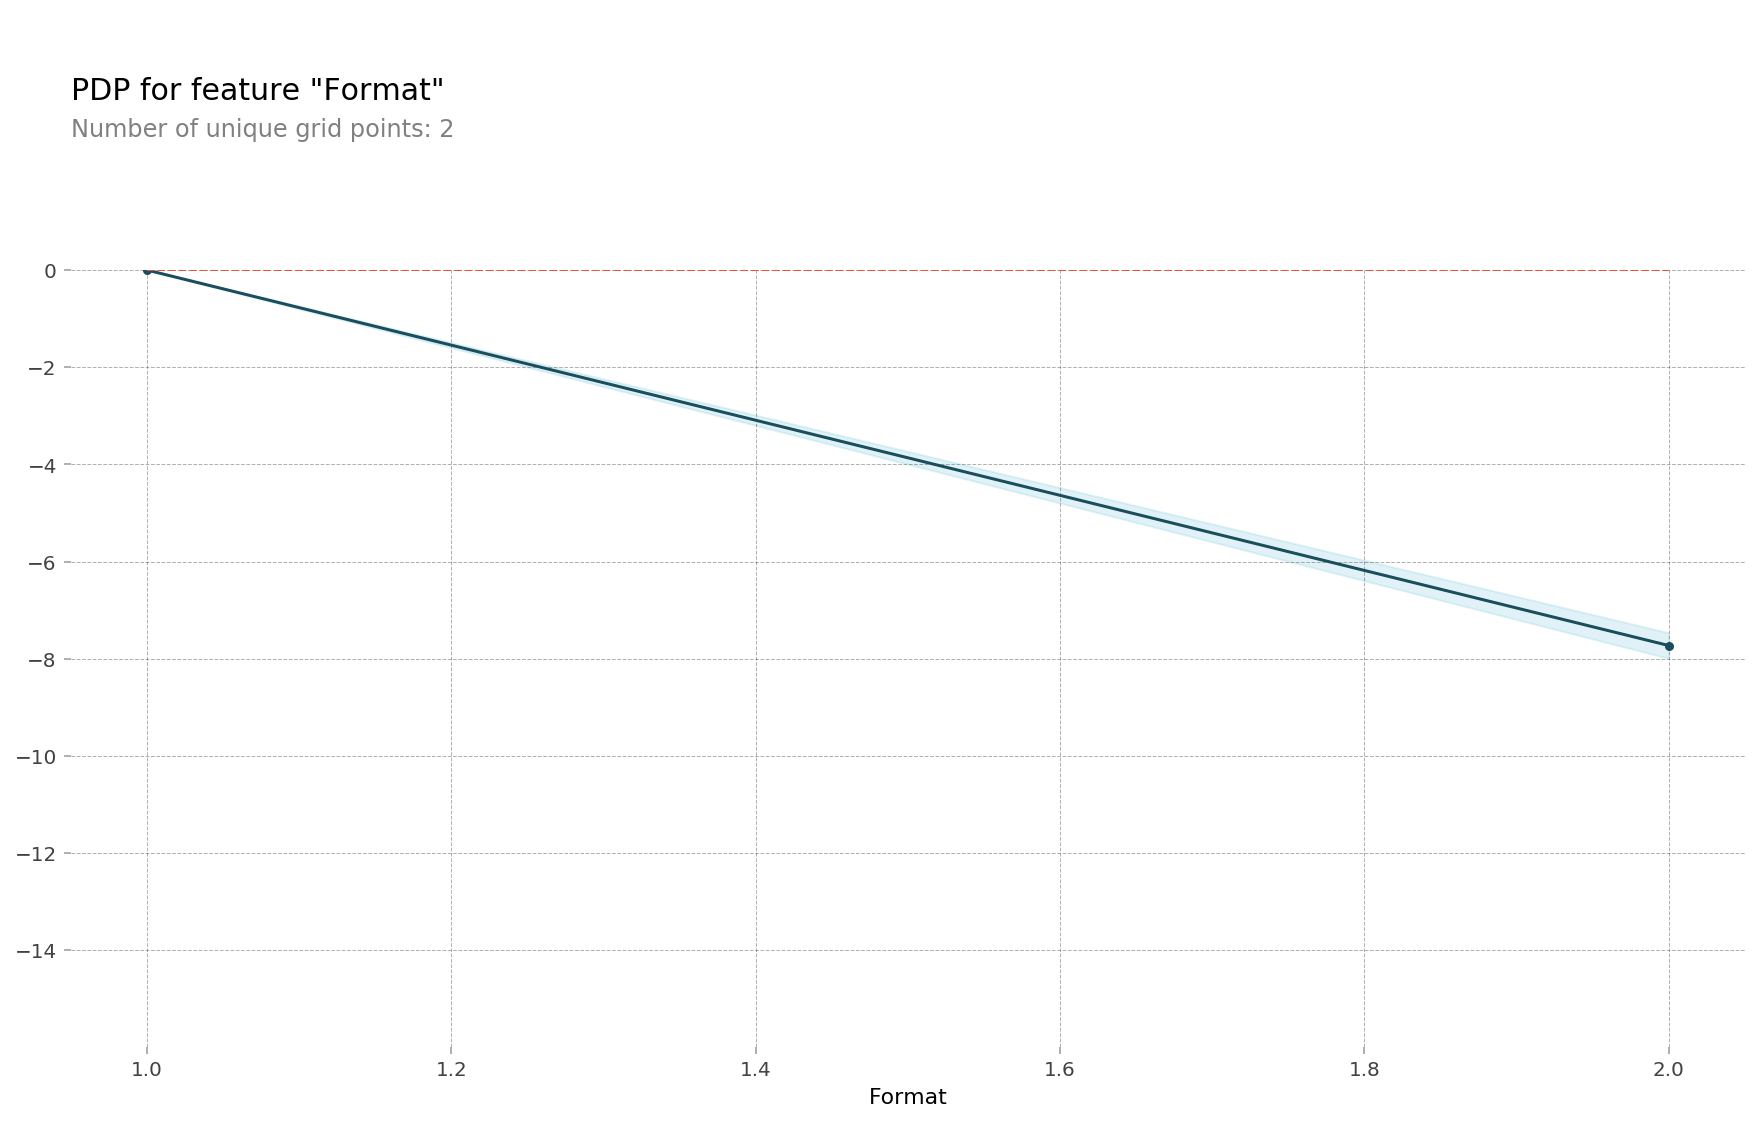

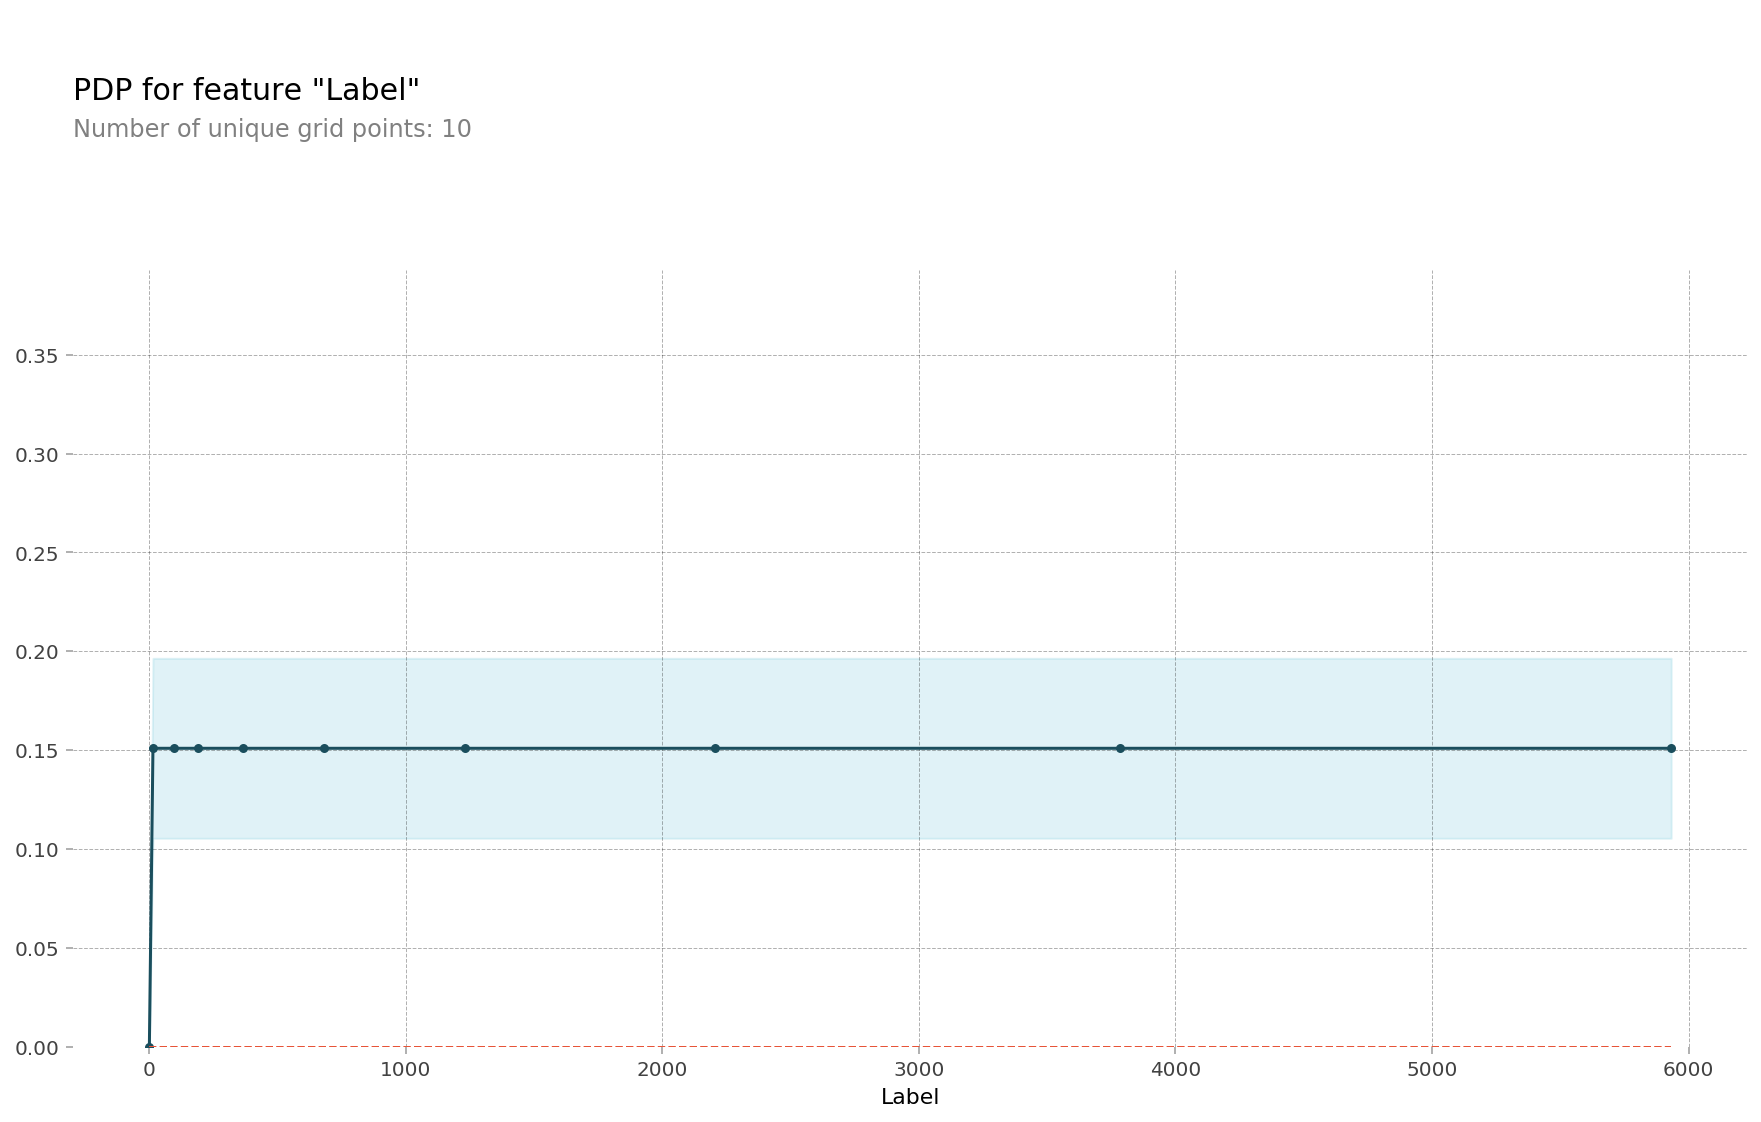

In [66]:
encoder = model3.named_steps['ordinalencoder']
X_encoded = encoder.fit_transform(X_total)
rf = model3.named_steps['randomforestregressor']

import matplotlib.pyplot as plt
from pdpbox import pdp
feature = ['Title','Release Month','Format','Label']

for i in feature:
    pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_encoded, model_features=X_total.columns, feature=i)
    pdp.pdp_plot(pdp_dist, i); 

### 카테고리형태의 특성들의 관계도 비교해본결과 타이틀,Release Month,label은 양의 관계를 가지고있습니다.
#### format만 타겟과 음의관계를 가집니다.
#### 릿지 모델에서도 확인해 보겠습니다.

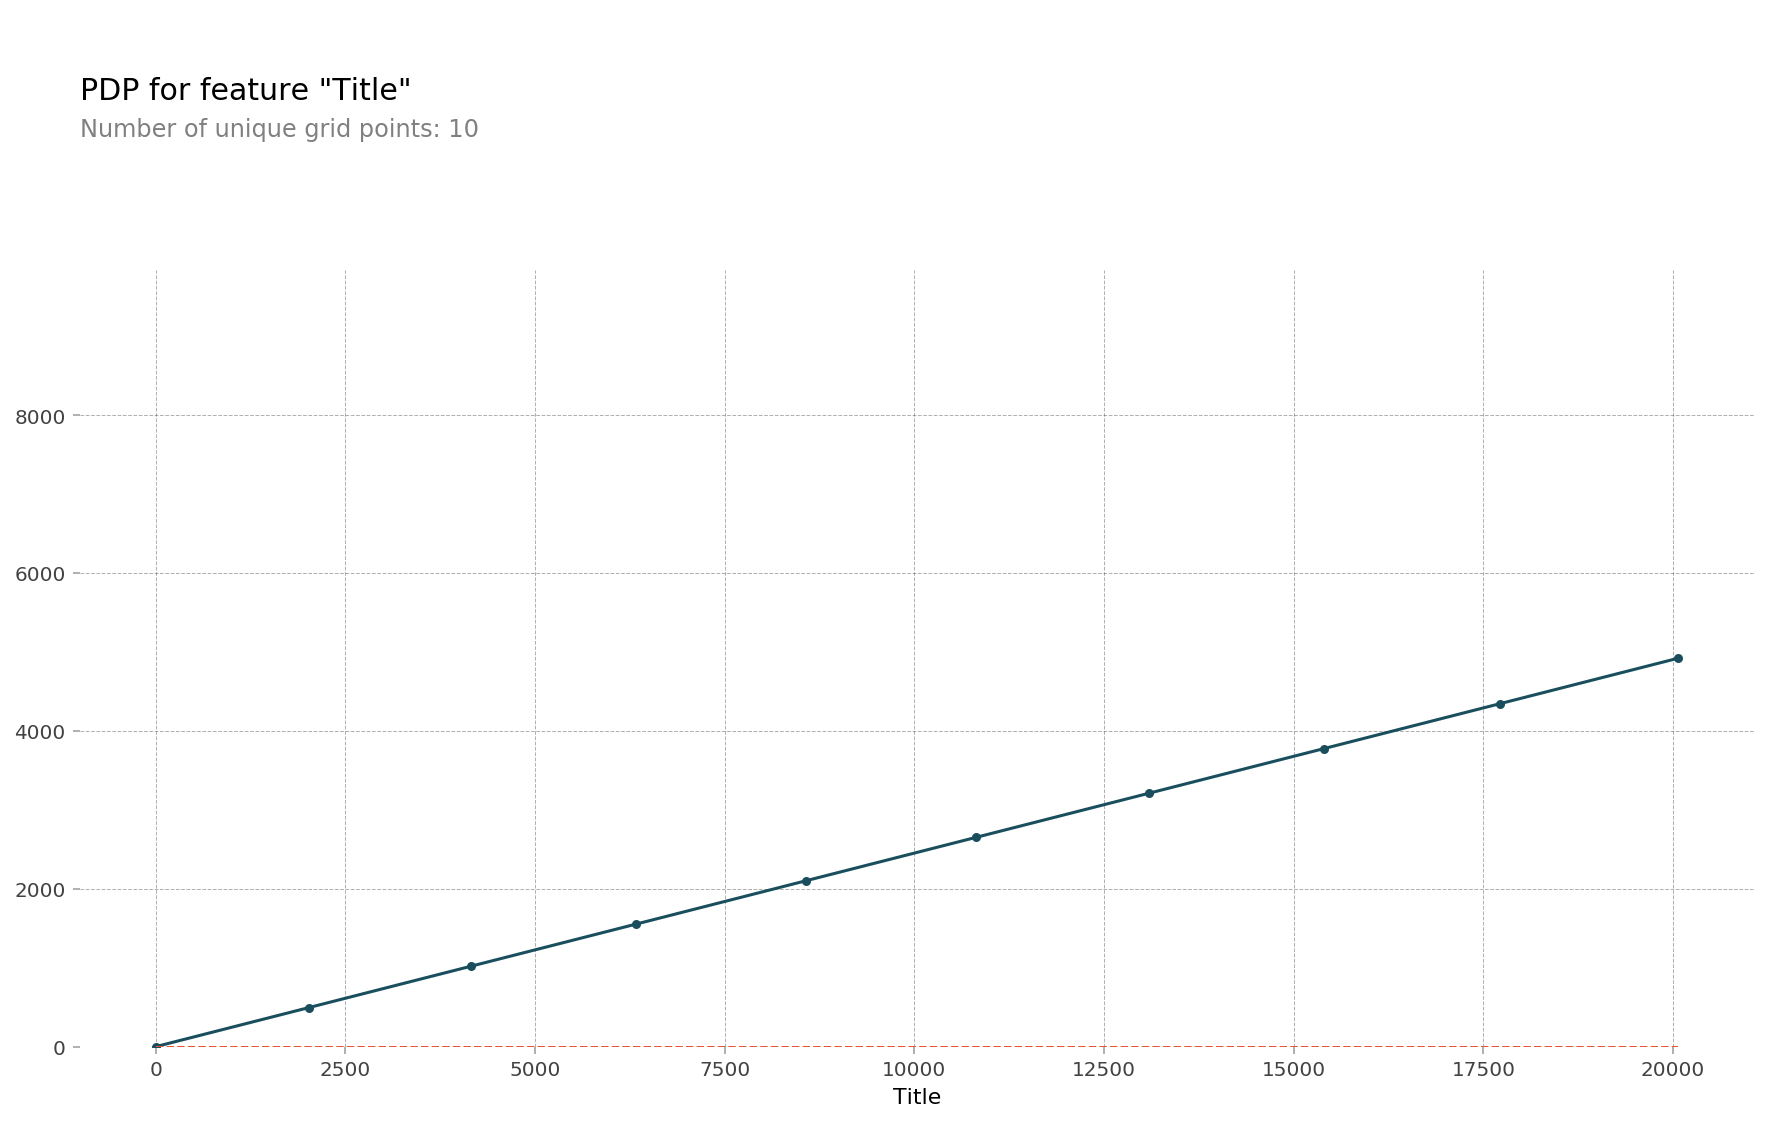

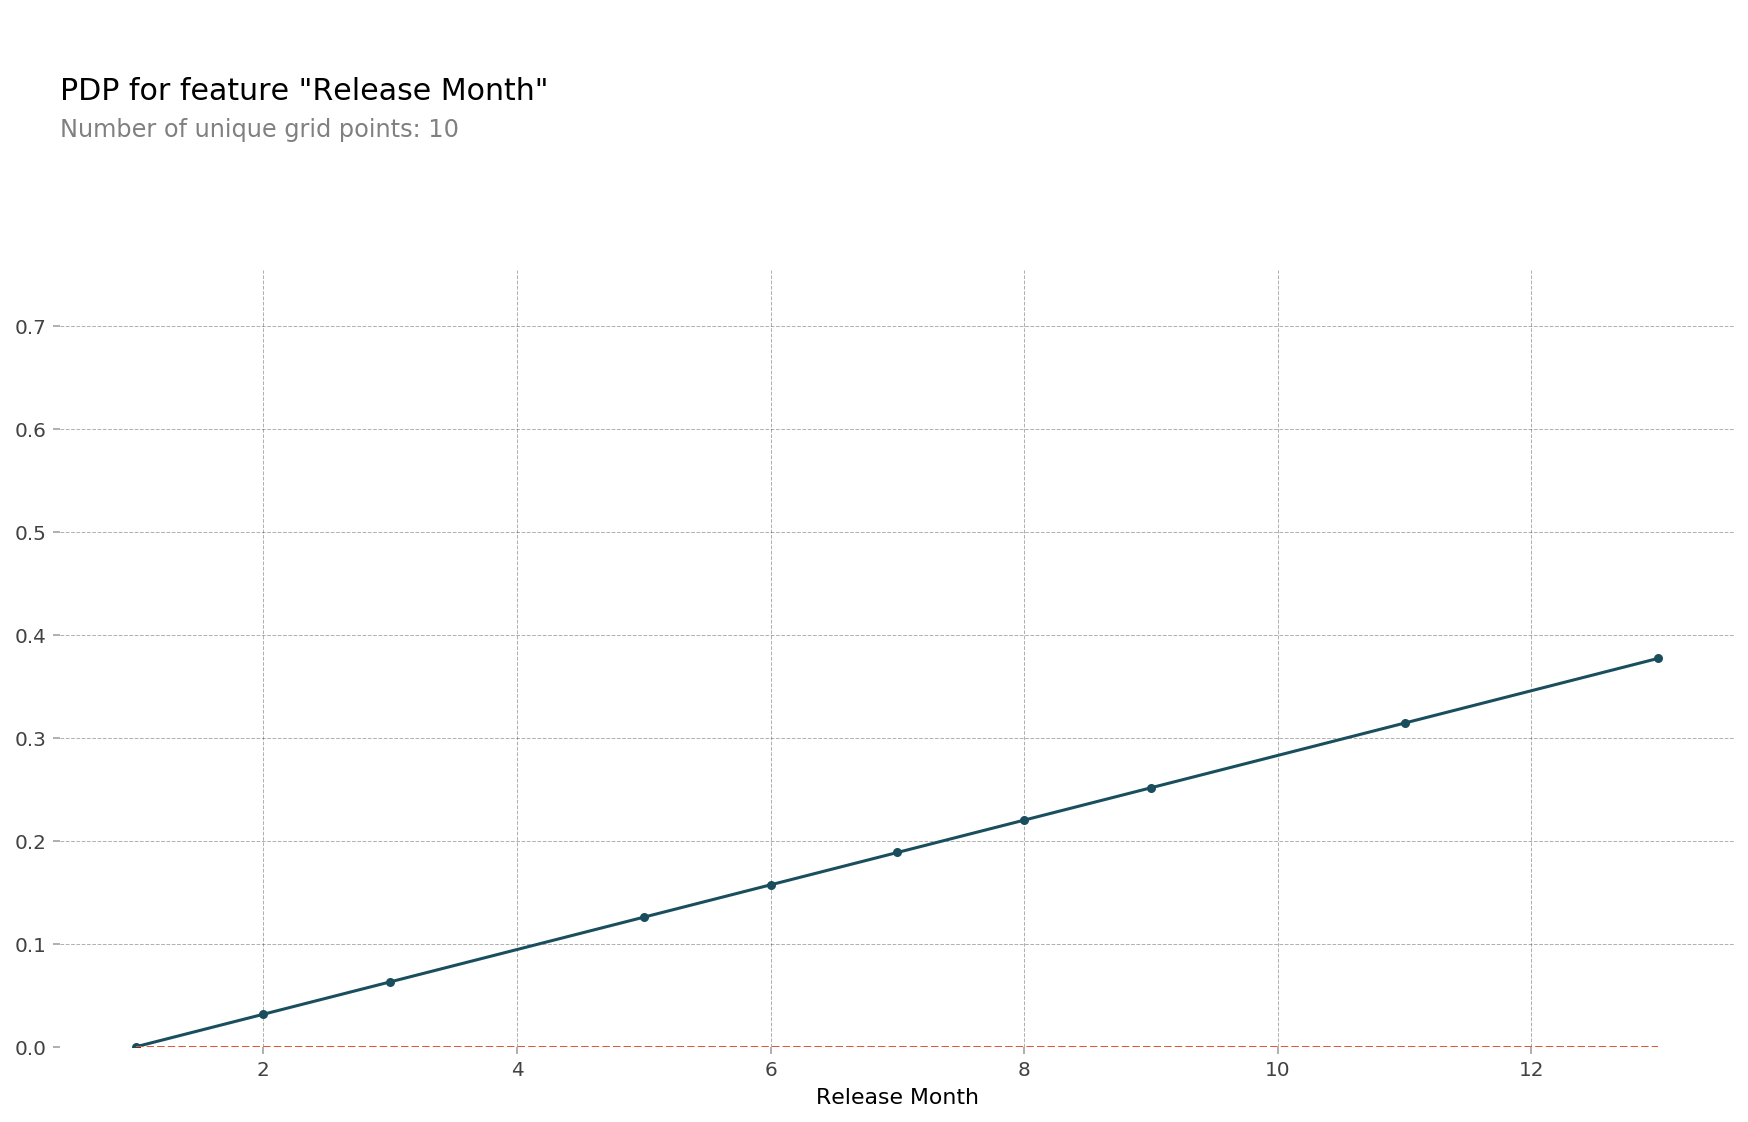

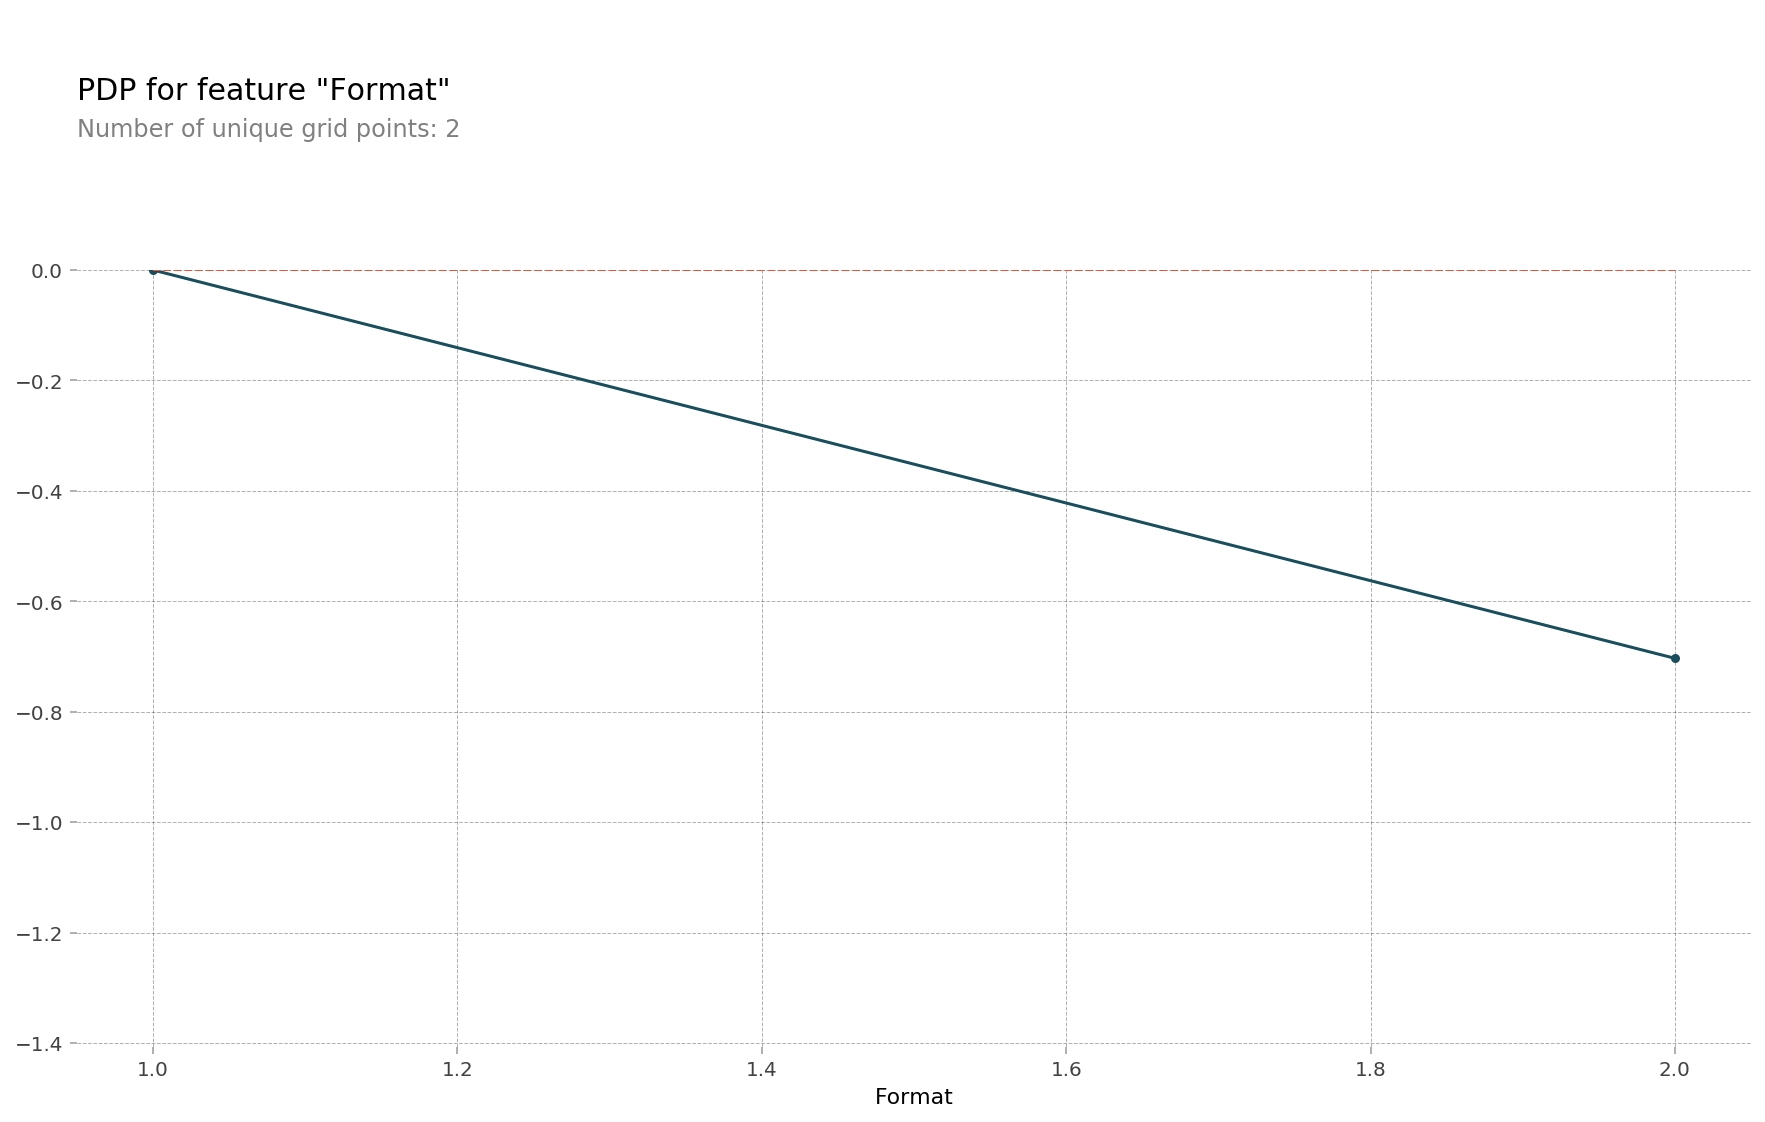

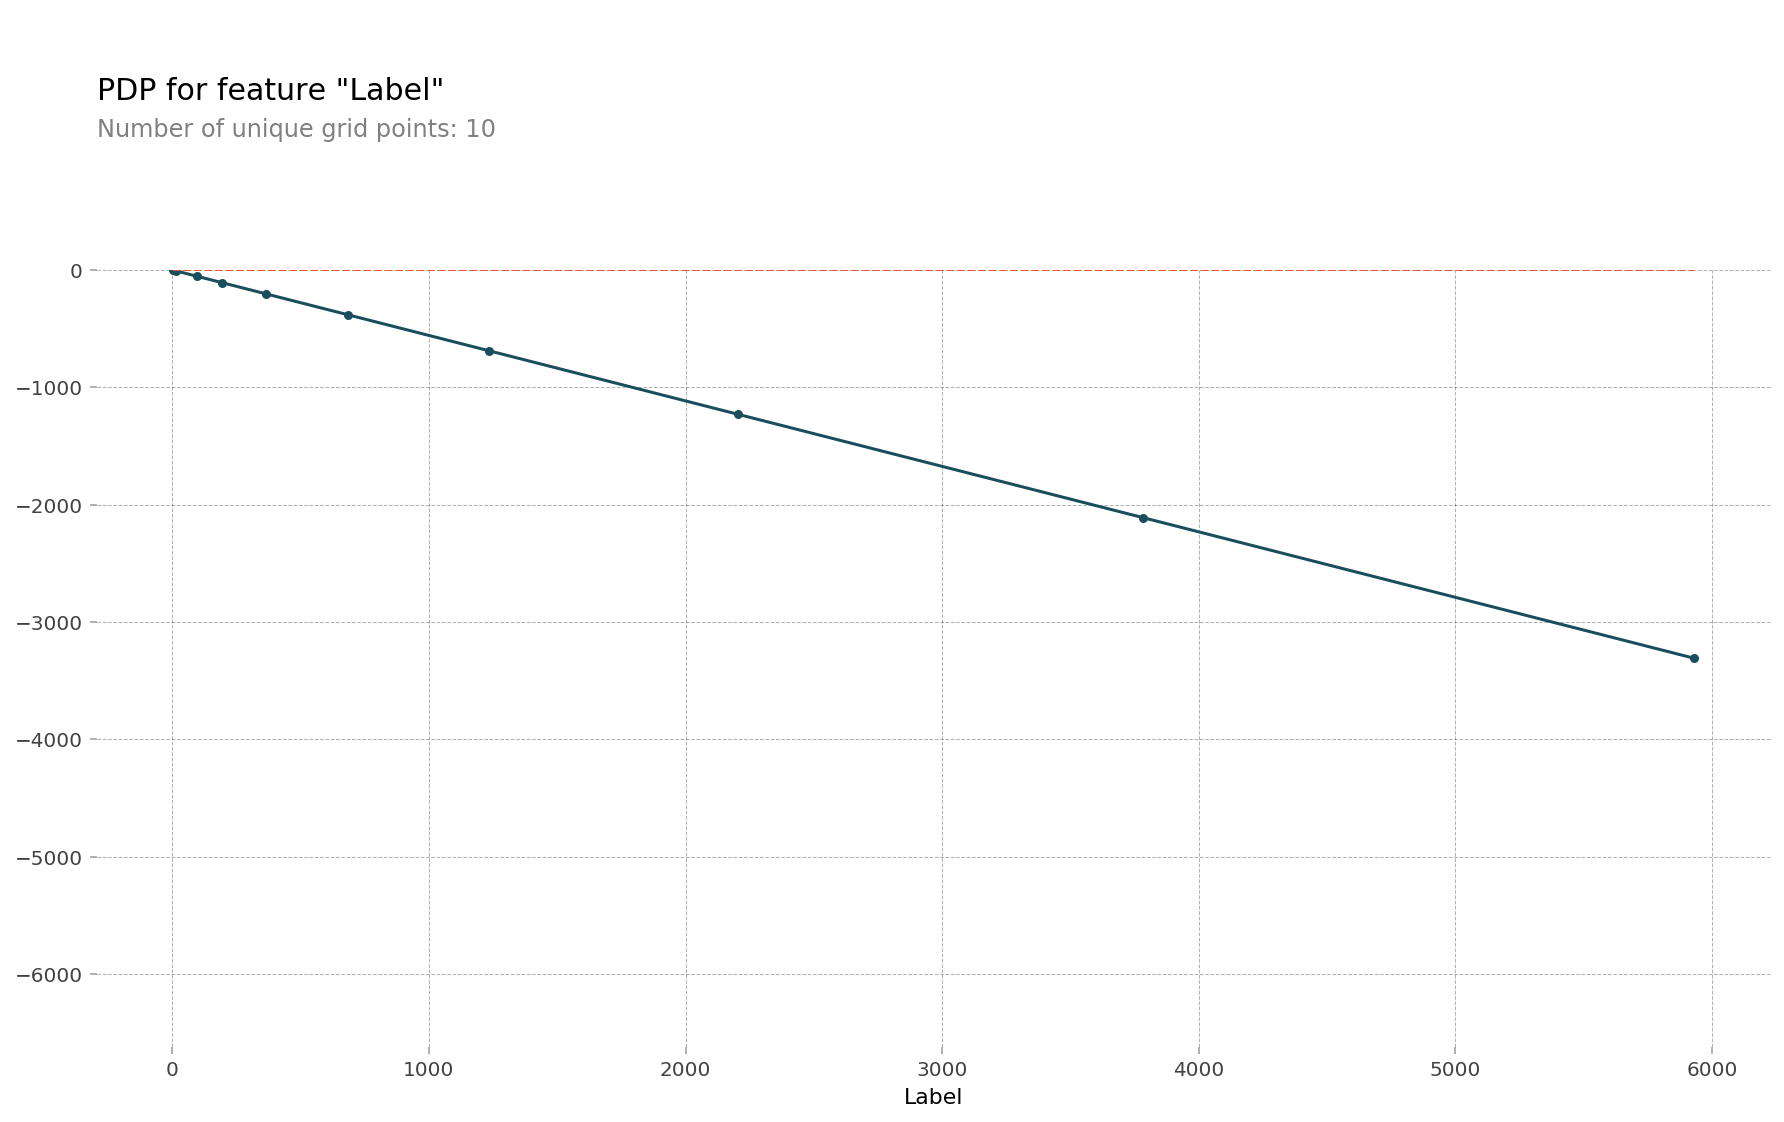

In [67]:
encoder = model4.named_steps['ordinalencoder']
X_encoded2 = encoder.fit_transform(X_total)
rf2 = model4.named_steps['ridge']
for i in feature:
    pdp_dist = pdp.pdp_isolate(model=rf2, dataset=X_encoded2, model_features=X_total.columns, feature=i)
    pdp.pdp_plot(pdp_dist, i); 

#### 릿지모델에서 나온 결과는 title,Release Month는 타겟과 양의관계를 가지지만 좋은영향을주죠
#### Format,Label은 타겟과 음의관계를 가지고있습니다. 안좋은 영향이죠
### 